# Swahili News Classification DAE

This notebook will analyse the training data to get relevant information about the data that might help us make informed decisions about the training pipeline.

# Requirements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading

In [3]:
df = pd.read_csv('../data/Train.csv')
df.head()

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


# Data Size

In [4]:
print("There are {} samples".format(len(df)))

There are 5151 samples


In [5]:
df['category'].value_counts()

category
Kitaifa      2000
michezo      1720
Biashara     1360
Kimataifa      54
Burudani       17
Name: count, dtype: int64

### Analysis

The data size seems to be relatively small. It suggests that deep learning models trained from scratch might not be appropriate for such problems as they are susceptible to **overfitting** in this case. Therefore, we should consider lightweight solutions like a bag of words **(BOW) + a small neural network** or **pre-trained models** trained on a few number epochs to prevent overfitting.

# Class Distribution

<Axes: xlabel='category'>

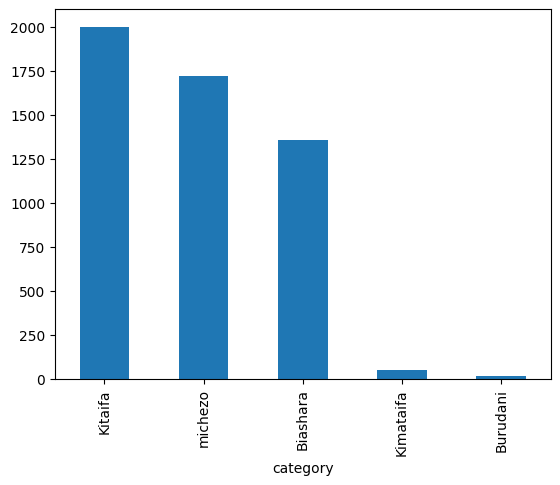

In [6]:
df['category'].value_counts().plot(kind='bar')

### Analysis

There seem to an **imablance** distribution of classes in the data. The might biased the mode towards the majority class (*Kitaifa*, *Michezo*, *Biashara*). As a result, we might want to consider one of the following solutions:
- Oversampling
- Data Augmentation


# Sentences Size

In [7]:
sentenze_sizes = [len(text.split()) for text in df['content'].to_list()]
print("max seq length: {}".format(max(sentenze_sizes)))
print("min seq length: {}".format(min(sentenze_sizes)))

max seq length: 2564
min seq length: 0


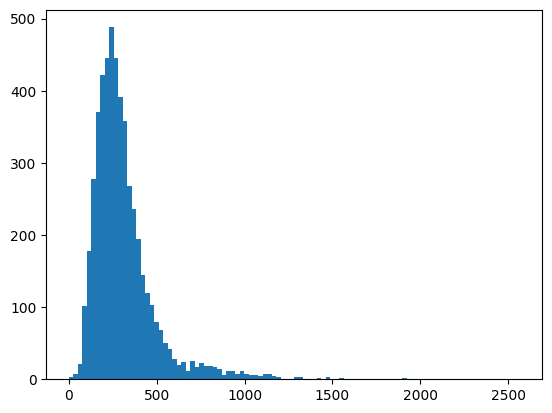

In [8]:
plt.hist(sentenze_sizes, bins=100)
plt.show()

### Analysis

We see that most sentences have approximately between 0 to 2500 words with the biggest concentration around 250 word. Therefore, It is advisable to have our **maximum sequence length** to be around **512** to make sure we cover a reasonable portion of the sentences of this dataset.